In [31]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [15]:
iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Decision Tree Classifier

In [29]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
cv = GridSearchCV(model, parameter, scoring='accuracy', error_score='raise')
cv.fit(x_train, y_train)

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [30]:
best_model = cv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

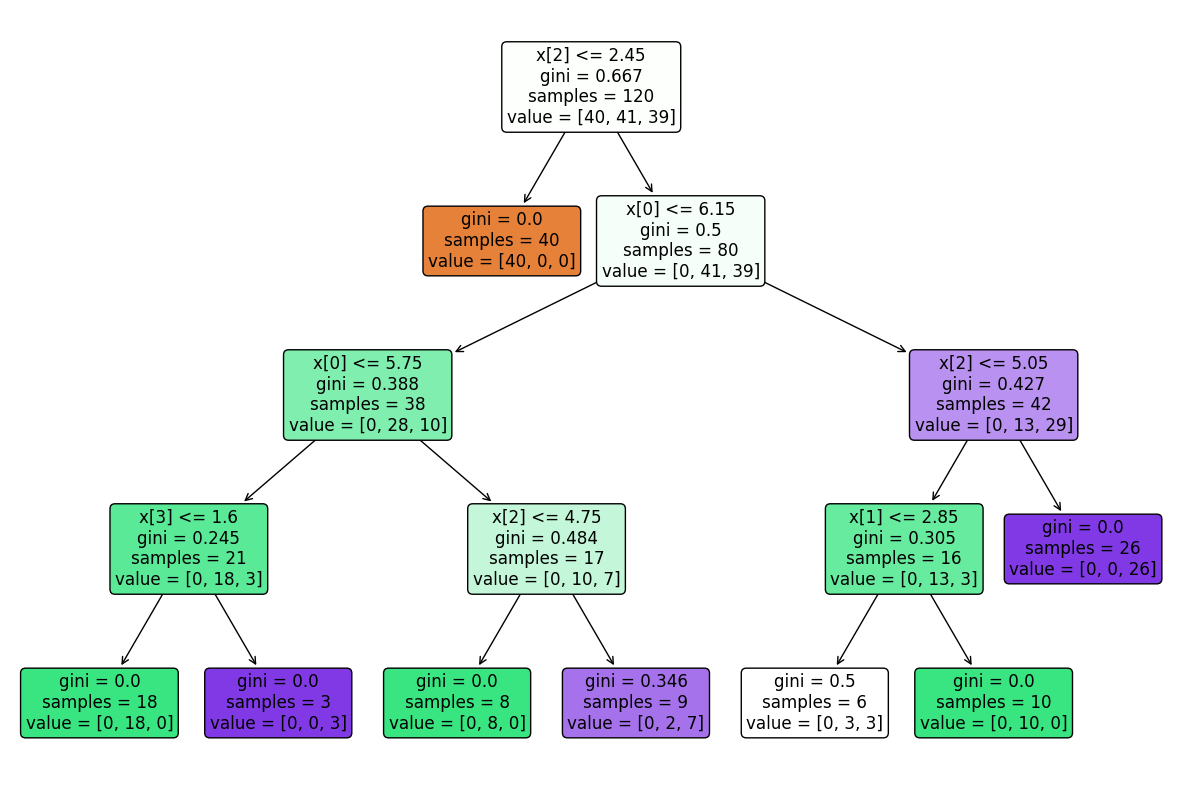

In [32]:
plt.figure(figsize=(15,10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)
plt.show()

In [33]:
y_pred = cv.predict(iris.data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [35]:
score=accuracy_score(y_pred, iris.target)
score

0.9666666666666667

### Random Forest Classifier

In [39]:
rclf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=0)
rclf.fit(x_train, y_train)
y_pred = rclf.predict(x_test)
accuracy_score(y_test, y_pred)

1.0